<a href="https://colab.research.google.com/github/aditi230/CatsVsDogs/blob/main/catvsdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

{}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

401 - Unauthorized


In [ ]:
!kaggle competitions download -c dogs-vs-cats

401 - Unauthorized


In [ ]:
!unzip train.zip

unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.


In [ ]:
rm test1.zip sampleSubmission.csv train.zip

In [ ]:
Dataset_location = "train"

In [ ]:
import os

In [ ]:
filenames=os.listdir(Dataset_location)

In [ ]:
classes = []
for filename in filenames:
  image_class=filename.split(".")[0]
  if image_class=="dog":
    classes.append(1)
  else:
    classes.append(0)

In [ ]:
import pandas as pd
df=pd.DataFrame({"filenames":filenames,"category":classes})

In [ ]:
df.shape

(25000, 2)

In [ ]:
df["category"]=df["category"].replace({0:"cat",1:"dog"})


In [ ]:
df.head()

,filenames,category
0,dog.472.jpg,dog
1,dog.4694.jpg,dog
2,dog.11219.jpg,dog
3,cat.11435.jpg,cat
4,dog.4571.jpg,dog


In [ ]:
df["category"].value_counts()

dog    12500
cat    12500
Name: category, dtype: int64

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import random
sample=random.choice(filenames)

In [ ]:
from keras.preprocessing.image import load_img
image1=load_img(Dataset_location + "/" +sample)

In [ ]:
plt.imshow(image1)

In [ ]:
sample2=random.choice(filenames)
image2=load_img(Dataset_location + "/" +sample2)
plt.imshow(image2)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout


In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(64,64,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2))) #this is use to reduce the number of pixel it will only keep the brightest pixel
#drop out layer - helps to avoid over fitting 0.25-> 25% of layer will dropout
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=["accuracy"])

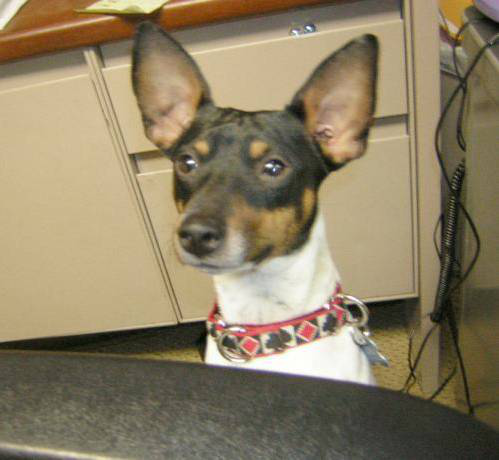

In [ ]:
train_img=load_img(Dataset_location + "/" +filename)


In [ ]:
model.fit(train_img,epochs=30)